In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.simplefilter("ignore")

## Load Mondrian results

In [76]:
entropy = pd.read_csv("birth_mondrian/entropy.csv").drop("Unnamed: 0", axis=1)
accuracy = pd.read_csv("birth_mondrian/RFCs_accuracy.csv")
cm = pd.read_csv("birth_mondrian/classification_metric.csv").drop("Unnamed: 0", axis=1)
dm = pd.read_csv("birth_mondrian/diameter_metric.csv").drop("Unnamed: 0", axis=1)

entropy["cond_entropy"] = entropy["cond_entropy"]/max(entropy["cond_entropy"])

data = pd.DataFrame()
data[["k_val","accuracy"]] = accuracy[["k_val", "accuracy"]]
data = data.merge(entropy)
data = data.merge(cm)
data = data.merge(dm)

mondrian = data[data["k_val"] == 2]
mondrian

,k_val,accuracy,cond_entropy,cm,dm
1,2,0.513228,0.441155,0.27663,0.888889


## Load Datafly and Incognito results

In [77]:
datafly = pd.read_csv("birth_datafly/k2_metrics.csv")
datafly

,k_val,cond_entropy,cm,dm,accuracy
0,2,0.082343,0.552729,0.444444,0.449735


In [78]:
incognito = pd.read_csv("birth_incognito/k2_metrics.csv")
incognito

,k_val,cond_entropy,cm,dm,accuracy
0,2,0.643436,0.510864,0.222222,0.420635


## Plots

In [79]:
sets = [mondrian, datafly, incognito]
labels = ["mondrian", "datafly", "incognito"]

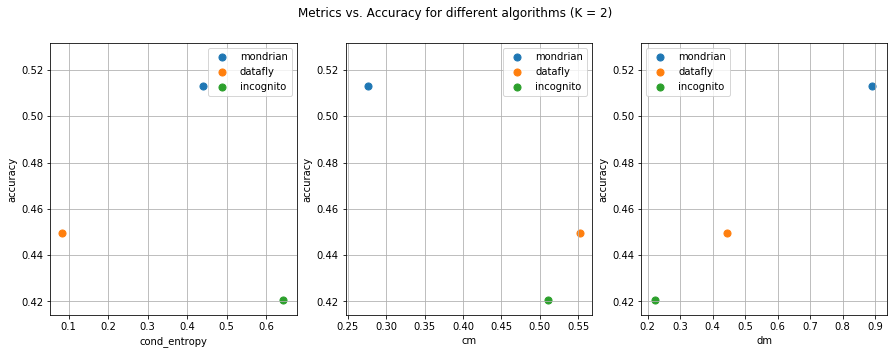

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Metrics vs. Accuracy for different algorithms (K = 2)')

for i, metric in enumerate(["cond_entropy", "cm", "dm"]):
    for j, algo in enumerate(sets):
        axs[i].scatter(algo.iloc[0][metric], algo.iloc[0]["accuracy"], label=labels[j], s=50)
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xlabel(metric)
    axs[i].set_ylabel("accuracy")
    
    